# Instacart Data-Wrangling

In this notebook, we will do the following:

1. Inspect the size of the data, and check if the data can fit into local memory. 
2. Review the Data Description
3. Conduct exploratory data analysis (EDA) on each of the raw data files.





### Import libraries and modify notebook settings

In [1]:
# Import libraries
import os
import sys
from psutil import virtual_memory

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, HTML, Markdown

# Modify notebook settings
%matplotlib inline
pd.options.display.max_columns = 100

### Create paths to data folders and create list of data files

In [2]:
# Create a variable for the project root directory
proj_root = os.path.join(os.pardir)

# Save the path to the folder 
# containing the original, immutable data dump:
# /data/raw/instacart_2017_05_01
raw_data_dir = os.path.join(proj_root,
                                "data",
                                "raw",
                                "instacart_2017_05_01")

# Save the path to the folder
# that will contain the intermediate data that will
# be transformed:
# /data/interim
interim_data_dir = os.path.join(proj_root,
                                "data",
                                "interim")

# Save path to data_description.md
data_description_file_path = os.path.join(proj_root,
                                          "references",
                                          "data_description.md")

In [3]:
# Create list of data files
raw_data_files = os.listdir(raw_data_dir)
raw_data_files

['aisles.csv',
 'departments.csv',
 'order_products__prior.csv',
 'order_products__train.csv',
 'orders.csv',
 'products.csv']

In [48]:
len(raw_data_files)

6

### Define functions we will use later

In [4]:
#sizeof_fmt
def format_bytes_size(num):
    """
    Given an integer value of bytes, 
    convert to the most appropriate units
    ('bytes', 'kB', 'MB', 'GB', ...), and    
    return a string containing the number 
    of units and the unit label 
    ('bytes', 'kB', 'MB', 'GB', ...)
    """
    base = 1024
    for unit in ['bytes', 'kB', 'MB', 'GB', 'TB', 'PB', 'EB', 'ZB', 'YB']:
        if abs(num) < base:
            return "%3.2f %s" % (num, unit)
            break
        else:
            num /= base

In [5]:
def create_df(file_index_number=0, 
              file_list=raw_data_files, 
              file_dir=raw_data_dir):
    """
    Function to create a DataFrame given an 
    index number of the file list (raw_data_files)
    """

    # Set path
    file_dir = os.path.join(file_dir, file_list[file_index_number])
    
    # Create DataFrame from path
    df_f = pd.read_csv(file_dir)

    return df_f

In [6]:
def preview_df(file_index_number=0, 
               file_list=raw_data_files, 
               file_dir=raw_data_dir):
    """
    Function to print/display summary of a 
    DataFrame given an index number of the
    file list (raw_data_files)
    """

    # Create DataFrame from path
    df_f = create_df(file_index_number, 
                     file_list, 
                     file_dir)

    #Print File index number
    print('File index number:')
    print(file_n)

    #Print File name
    print('\nFile name:')
    print(file_list[file_n])

    #Print column names
    print('\nColumns:')
    print(*list(df_f.columns), sep='\n')

    #Print shape of the DataFrame
    print('\nShape:')
#    print(df_f.shape)
    print("n_rows:\t{:,}".format(df_f.shape[0]))
    print("n_cols:\t{:,}".format(df_f.shape[1]))

    #Display head of the DataFrame
    print('\nHead:')
    display(df_f.head())

## 1. Can the data can fit into local memory?


+ total: total physical memory.
+ available: the memory that can be given instantly to processes without the system going into swap. This is calculated by summing different memory values depending on the platform and it is supposed to be used to monitor actual memory usage in a cross platform fashion.

+ free: memory not being used at all (zeroed) that is readily available; note that this doesn’t reflect the actual memory available (use available instead). total - used does not necessarily match free.

https://pythonhosted.org/psutil/

In [7]:
mem = virtual_memory()

print('Total physical memory:\t', format_bytes_size(mem.total))
print('Available memory:\t', format_bytes_size(mem.available))
print('Free memory:\t\t', format_bytes_size(mem.free))

#format_bytes_size(new_df.loc['Total', 'size_int'])

Total physical memory:	 4.00 GB
Available memory:	 1013.64 MB
Free memory:		 14.41 MB


In [8]:

i_list = []
file_name_list = []
shape_list = []
size_list = []
size_str_list = []

for i, f in enumerate(raw_data_files):
    raw_data_path_f = os.path.join(raw_data_dir, f)

    df_f = pd.read_csv(raw_data_path_f)
    
    i_list.append(i)
    file_name_list.append(f)
    shape_list.append(df_f.shape)
    size_list.append(sys.getsizeof(df_f))
    size_str_list.append(format_bytes_size(sys.getsizeof(df_f)))

    # Clear the DataFrame object from memory
    del df_f

files_dict = {'n' : i_list,
              'file_name' : file_name_list,
              'shape' : shape_list,
              'size_int' : size_list,
              'size_str' : size_str_list}


size_df = pd.DataFrame(files_dict)
size_df.set_index('n', inplace=True)

total_size = size_df.size_int.sum()

size_df.loc['Total']= ['', '', total_size, format_bytes_size(total_size)]

size_df

,file_name,shape,size_int,size_str
n,,,,
0,aisles.csv,"(134, 2)",10840,10.59 kB
1,departments.csv,"(21, 2)",1639,1.60 kB
2,order_products__prior.csv,"(32434489, 4)",1037903752,989.82 MB
3,order_products__train.csv,"(1384617, 4)",44307848,42.26 MB
4,orders.csv,"(3421083, 7)",376244234,358.81 MB
5,products.csv,"(49688, 4)",5568387,5.31 MB
Total,,,1464036700,1.36 GB


In [9]:
size_df = pd.DataFrame(files_dict)
size_df.set_index('n', inplace=True)

total_size = size_df.size_int.sum()

size_df.loc['Total']= ['', '', total_size, format_bytes_size(total_size)]

size_df

,file_name,shape,size_int,size_str
n,,,,
0,aisles.csv,"(134, 2)",10840,10.59 kB
1,departments.csv,"(21, 2)",1639,1.60 kB
2,order_products__prior.csv,"(32434489, 4)",1037903752,989.82 MB
3,order_products__train.csv,"(1384617, 4)",44307848,42.26 MB
4,orders.csv,"(3421083, 7)",376244234,358.81 MB
5,products.csv,"(49688, 4)",5568387,5.31 MB
Total,,,1464036700,1.36 GB


In [10]:
mem = virtual_memory()
mem

svmem(total=4294967296, available=1159933952, percent=73.0, used=2878214144, free=296284160, active=857952256, inactive=863649792, wired=1156612096)

+ Free: This is the amount of RAM that's not being used.
+ Wired: Information in RAM that can't be moved to the Mac's drive. The amount of Wired memory depends on the applications you are using.
+ Active: This information is in RAM and has recently been used.
+ Inactive: This information is in RAM but isn't actively being used, though it was recently used. For example, if you've been using Mail and then quit it, the RAM that Mail was using is marked as Inactive memory. Inactive memory is available for use by another application, just like free memory. However, if you open Mail before its inactive memory is used by a different application, Mail will open quicker because its inactive memory is converted to active memory, instead of loading it from the slower drive.
+ Used: This is the total amount of RAM used.

[source](https://support.apple.com/en-us/HT201538)


+ total: total physical memory.
+ available: the memory that can be given instantly to processes without the system going into swap. This is calculated by summing different memory values depending on the platform and it is supposed to be used to monitor actual memory usage in a cross platform fashion.

+ free: memory not being used at all (zeroed) that is readily available; note that this doesn’t reflect the actual memory available (use available instead). total - used does not necessarily match free.

https://pythonhosted.org/psutil/

In [11]:
print('Total physical memory:\t', format_bytes_size(mem.total))
print('Available memory:\t', format_bytes_size(mem.available))
print('Free memory:\t\t', format_bytes_size(mem.free))

Total physical memory:	 4.00 GB
Available memory:	 1.08 GB
Free memory:		 282.56 MB


In [12]:
format_bytes_size(size_df.loc['Total', 'size_int'])

'1.36 GB'

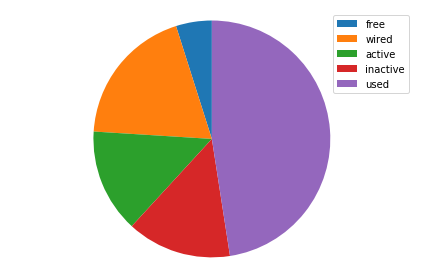

In [13]:

labels = ['free',
          'wired',
          'active',
          'inactive',
          'used']

sizes = [mem.free,
         mem.wired,
         mem.active,
         mem.inactive,
         mem.used]

#colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
#patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
patches, texts = plt.pie(sizes,  shadow=False, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

## 2.  Review the Data Description

In [14]:
# Open data_description.md and display inline
with open(data_description_file_path, 'r') as f:
    content = f.read()
display(Markdown(content))

### Data Description

`orders` (3.4m rows, 206k users):
* `order_id`: order identifier
* `user_id`: customer identifier
* `eval_set`: which evaluation set this order belongs in (see `SET` described below)
* `order_number`: the order sequence number for this user (1 = first, n = nth)
* `order_dow`: the day of the week the order was placed on
* `order_hour_of_day`: the hour of the day the order was placed on
* `days_since_prior`: days since the last order, capped at 30 (with NAs for `order_number` = 1)

`products` (50k rows):
* `product_id`: product identifier
* `product_name`: name of the product
* `aisle_id`: foreign key
* `department_id`: foreign key

`aisles` (134 rows):
* `aisle_id`: aisle identifier
* `aisle`: the name of the aisle

`deptartments` (21 rows):
* `department_id`: department identifier
* `department`: the name of the department

`order_products__SET` (30m+ rows):
* `order_id`: foreign key
* `product_id`: foreign key
* `add_to_cart_order`: order in which each product was added to cart
* `reordered`: 1 if this product has been ordered by this user in the past, 0 otherwise

where `SET` is one of the four following evaluation sets (`eval_set` in `orders`):
* `"prior"`: orders prior to that users most recent order (~3.2m orders)
* `"train"`: training data supplied to participants (~131k orders)
* `"test"`: test data reserved for machine learning competitions (~75k orders)

-----------------------------------

See the original source of this data description [here](https://gist.github.com/jeremystan/c3b39d947d9b88b3ccff3147dbcf6c6b).

## 3. Conduct EDA on each of the raw data files.

In [15]:
# dir()
raw_data_files

['aisles.csv',
 'departments.csv',
 'order_products__prior.csv',
 'order_products__train.csv',
 'orders.csv',
 'products.csv']

In [16]:
for i in range(len(raw_data_files)):
    print('File:', raw_data_files[i])
    df_n = create_df(i)
    print(*list(df_n.columns), sep='\n')
    print('\n')

File: aisles.csv
aisle_id
aisle


File: departments.csv
department_id
department


File: order_products__prior.csv
order_id
product_id
add_to_cart_order
reordered


File: order_products__train.csv
order_id
product_id
add_to_cart_order
reordered


File: orders.csv
order_id
user_id
eval_set
order_number
order_dow
order_hour_of_day
days_since_prior_order


File: products.csv
product_id
product_name
aisle_id
department_id




In [17]:
raw_data_files[5]
df_n = create_df(5)

In [18]:
len(df_n)

49688

In [19]:
len(df_n.product_id.unique())

49688

In [20]:
df_n.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [21]:
raw_data_files[4]

'orders.csv'

In [22]:
df_n = create_df(4)

In [23]:
len(df_n)

3421083

In [24]:
df_n.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [25]:
df_n.eval_set.value_counts()

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

In [26]:
df_n[df_n.eval_set == 'prior'].user_id.value_counts().max()

99

In [27]:
df_n[df_n.eval_set == 'test'].user_id.value_counts().max()

1

In [28]:
df_n[df_n.eval_set == 'train'].user_id.value_counts().max()

1

In [29]:
user_id_set_prior = set(df_n[df_n.eval_set == 'prior'].user_id)

In [30]:
user_id_set_test = set(df_n[df_n.eval_set == 'test'].user_id)

In [31]:
user_id_set_train = set(df_n[df_n.eval_set == 'train'].user_id)

In [32]:
len(user_id_set_test.intersection(user_id_set_train))

0

In [33]:
len(user_id_set_prior.intersection(user_id_set_test))

75000

In [34]:
len(user_id_set_prior.intersection(user_id_set_train))

131209

### aisles.csv - EDA

In [35]:
file_n = 0
preview_df(file_n)
df_n = create_df(file_n)

File index number:
0

File name:
aisles.csv

Columns:
aisle_id
aisle

Shape:
n_rows:	134
n_cols:	2

Head:


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [36]:
print('len - all:\t\t', len(df_n))
print('len - unique aisle :\t', len(df_n.aisle.unique()))
print('len - unique aisle_id:\t', len(df_n.aisle_id.unique()))

len - all:		 134
len - unique aisle :	 134
len - unique aisle_id:	 134


### departments.csv - EDA

In [37]:
file_n = 1
preview_df(file_n)
df_n = create_df(file_n)

File index number:
1

File name:
departments.csv

Columns:
department_id
department

Shape:
n_rows:	21
n_cols:	2

Head:


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [38]:
print('len - all:\t\t\t', len(df_n))
print('len - unique department:\t', len(df_n.department.unique()))
print('len - unique department_id:\t', len(df_n.department_id.unique()))

len - all:			 21
len - unique department:	 21
len - unique department_id:	 21


### order_products__prior.csv - EDA

In [39]:
file_n = 2
preview_df(file_n)
df_n = create_df(file_n)

File index number:
2

File name:
order_products__prior.csv

Columns:
order_id
product_id
add_to_cart_order
reordered

Shape:
n_rows:	32,434,489
n_cols:	4

Head:


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [40]:
print('len - all:\t\t\t', len(df_n))
print('len - unique order_id:\t\t', len(df_n.order_id.unique()))
print('len - unique product_id:\t', len(df_n.product_id.unique()))
print('len - unique add_to_cart_order:\t', 
      len(df_n.add_to_cart_order.unique()))
print('len - unique reordered:\t\t', len(df_n.reordered.unique()))

len - all:			 32434489
len - unique order_id:		 3214874
len - unique product_id:	 49677
len - unique add_to_cart_order:	 145
len - unique reordered:		 2


### order_products__train.csv -EDA

In [41]:
file_n = 3
preview_df(file_n)
df_n = create_df(file_n)

File index number:
3

File name:
order_products__train.csv

Columns:
order_id
product_id
add_to_cart_order
reordered

Shape:
n_rows:	1,384,617
n_cols:	4

Head:


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [42]:
print('len - all:\t\t\t', len(df_n))
print('len - unique order_id:\t\t', len(df_n.order_id.unique()))
print('len - unique product_id:\t', len(df_n.product_id.unique()))
print('len - unique add_to_cart_order:\t', 
      len(df_n.add_to_cart_order.unique()))
print('len - unique reordered:\t\t', len(df_n.reordered.unique()))

len - all:			 1384617
len - unique order_id:		 131209
len - unique product_id:	 39123
len - unique add_to_cart_order:	 80
len - unique reordered:		 2


### orders.csv - EDA

In [43]:
file_n = 4
preview_df(file_n)
df_n = create_df(file_n)

File index number:
4

File name:
orders.csv

Columns:
order_id
user_id
eval_set
order_number
order_dow
order_hour_of_day
days_since_prior_order

Shape:
n_rows:	3,421,083
n_cols:	7

Head:


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


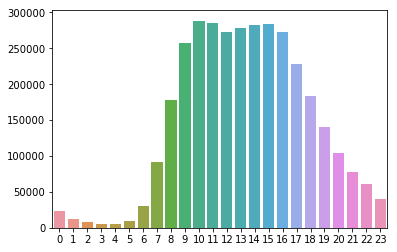

In [44]:
ohodvc = df_n.order_hour_of_day.value_counts()
ohodvc.sort_index(inplace=True)

sns.barplot(x=ohodvc.index.values, y=ohodvc.values)

### products.csv - EDA

In [45]:
file_n = 5
preview_df(file_n)
df_n = create_df(file_n)

File index number:
5

File name:
products.csv

Columns:
product_id
product_name
aisle_id
department_id

Shape:
n_rows:	49,688
n_cols:	4

Head:


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


    print('len - all:\t\t\t', len(df_n))
    print('len - unique order_id:\t\t', len(df_n.order_id.unique()))
    print('len - unique product_id:\t', len(df_n.product_id.unique()))
    print('len - unique add_to_cart_order:\t', 
          len(df_n.add_to_cart_order.unique()))
    print('len - unique reordered:\t\t', len(df_n.reordered.unique()))

    file_n = 0

    raw_data_path_f = os.path.join(raw_data_dir, raw_data_files[file_n])
    df_f = pd.read_csv(raw_data_path_f)

    print('File index number:')
    print(file_n)

    print('\nFile name:')
    print(raw_data_files[file_n])

    print('\nColumns:')
    print(*list(df_f.columns), sep='\n')

    print('\nHead:')
    display(df_f.head())

In [47]:
len(df_f.aisle_id.unique())

NameError: name 'df_f' is not defined

In [ ]:
len(df_f)

In [ ]:
file_n = 1
preview_df(file_n)

In [ ]:
for i, f in enumerate(raw_data_files):
    raw_data_path_f = os.path.join(raw_data_dir, f)
    df_f = pd.read_csv(raw_data_path_f)